<a href="https://colab.research.google.com/github/Sithija97/Python-Projects/blob/main/Copy_of_typesofshots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

medium link : https://betterprogramming.pub/how-i-used-a-convolutional-neural-network-to-classify-cricket-shots-d44197e79aff

In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"


Mounted at /content/gdrive


### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ads block add-ons (YouBlock) in Chrome. Otherwise window.open() coomand doesn't work. Then you can run the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [ ]:
folder = 'sweep'
file = 'urls_sweep.csv'

In [ ]:
folder = 'coverdrive'
file = 'urls_coverdrive.csv'

In [ ]:
folder = 'straightdrive'
file = 'urls_straightdrive.csv'

In [ ]:
folder = 'helicopter'
file = 'urls_helicopter.csv'

In [ ]:
folder = 'scoop'
file = 'urls_scoop.csv'

In [ ]:
folder = 'pull'
file = 'urls_pull.csv'

You will need to run this cell once per each category.

In [ ]:
path = Path(root_dir + 'data/shots')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

NameError: ignored

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](https://github.com/fastai/course-v3/blob/master/nbs/dl1/images/download_images/upload.png?raw=1)

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [ ]:
classes = ['sweep', 'coverdrive', 'straightdrive', 'helicopter', 'scoop', 'pull']

In [ ]:
download_images(path/file, dest, max_pics=1000)

Then we can remove any images that can't be opened:

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## View data

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [ ]:
data.classes

['coverdrive', 'helicopter', 'pull', 'scoop', 'straightdrive', 'sweep']

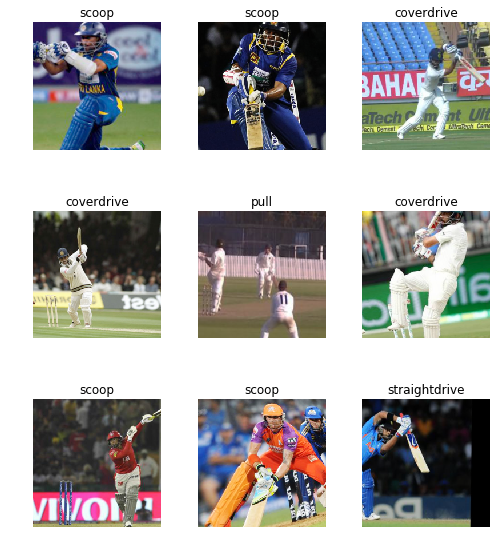

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['coverdrive', 'helicopter', 'pull', 'scoop', 'straightdrive', 'sweep'],
 6,
 443,
 110)

## Train model

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

NameError: ignored

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.092563,1.669619,0.690909,00:10
1,1.734051,1.756508,0.572727,00:07
2,1.494919,1.444240,0.500000,00:07
3,1.302861,1.407040,0.500000,00:07
4,1.174984,1.373754,0.500000,00:07


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


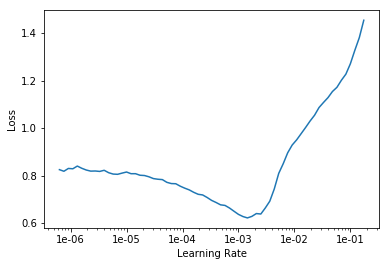

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.832410,1.349595,0.427273,00:08
1,0.729212,1.333644,0.409091,00:08


In [ ]:
learn.save('stage-2')

## Interpretation

In [ ]:
learn.load('stage-2');

In [ ]:
learn.fit(1)

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: ignored

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

RuntimeError: ignored

In [ ]:
interp.plot_confusion_matrix()

NameError: ignored

In [ ]:
interp.most_confused()

[('coverdrive', 'straightdrive', 4),
 ('straightdrive', 'coverdrive', 4),
 ('sweep', 'scoop', 4),
 ('pull', 'sweep', 3),
 ('scoop', 'sweep', 3),
 ('straightdrive', 'pull', 3),
 ('straightdrive', 'sweep', 3),
 ('sweep', 'straightdrive', 3),
 ('coverdrive', 'helicopter', 2),
 ('helicopter', 'straightdrive', 2),
 ('helicopter', 'sweep', 2),
 ('scoop', 'helicopter', 2),
 ('sweep', 'pull', 2),
 ('coverdrive', 'pull', 1),
 ('helicopter', 'scoop', 1),
 ('pull', 'helicopter', 1),
 ('pull', 'scoop', 1),
 ('scoop', 'coverdrive', 1),
 ('scoop', 'straightdrive', 1),
 ('straightdrive', 'scoop', 1),
 ('sweep', 'coverdrive', 1)]

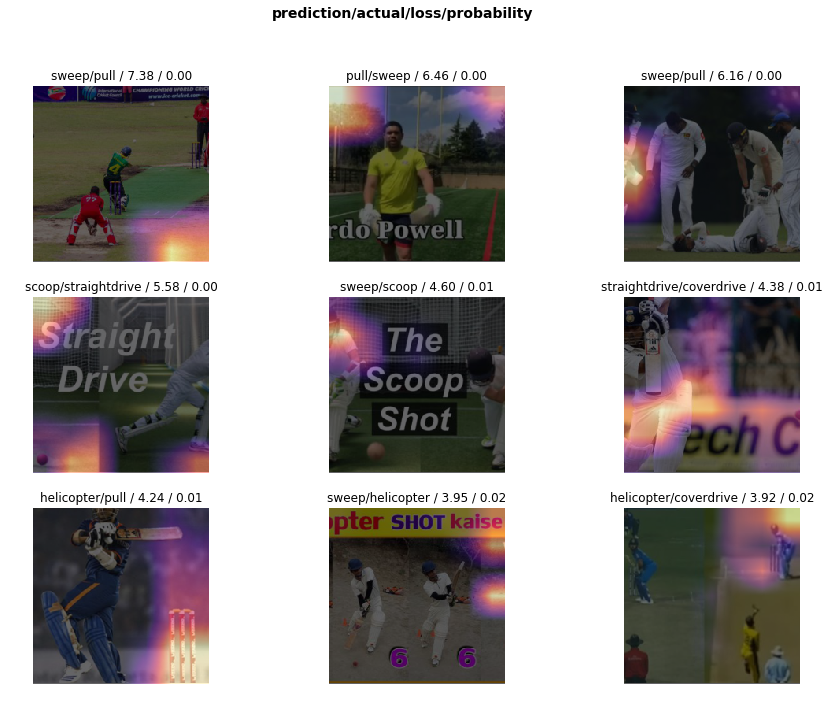

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [ ]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [ ]:
defaults.device = torch.device('cpu')

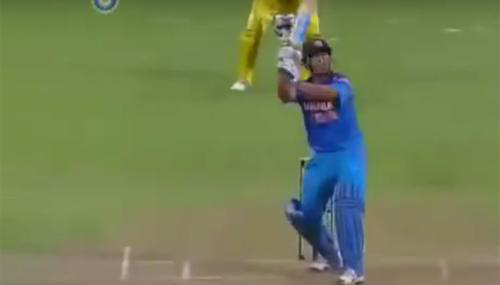

In [ ]:

img = open_image(path/'helicopter'/'00000016.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category helicopter